## Free data sets (examples)

1. Based on the descriptions at the pages of data providers explain what each data set means.
2. Select two data sets, and compare their changes at times when something happened in the world.
3. Note: the word `spread` usually means `difference`.

| Source | Name, Link to page | Type | Further information |
| :--- | :--| :--- | :-- |
|[Yahoo Finance](https://finance.yahoo.com) | [S&P500 stock market index](https://finance.yahoo.com/quote/%5EGSPC) | Equity index | US Large cap stocks |
| &nbsp; | [Walmart](https://finance.yahoo.com/quote/WMT) | Equity | Retail, Large capitalization |
| &nbsp; | [Amazon](https://finance.yahoo.com/quote/AMZN) | Equity | IT, Big cap |
| &nbsp; | [Tesla](https://finance.yahoo.com/quote/TSLA) | Equity | Tech / Cars, Big cap |
| &nbsp; | [BJ's Restaurants Inc.](https://finance.yahoo.com/quote/BJRI) | Equity | Catering industry, Small cap |
| &nbsp; | [Bitcoin](https://finance.yahoo.com/quote/BTC-USD) | FX |  Payments / Investment | 
| &nbsp; | [Ethereum](https://finance.yahoo.com/quote/ETH-USD) | FX | also infrastructural | 
| &nbsp; | [Ounce of gold in USD](https://finance.yahoo.com/quote/GC=F) | Commodity | Gold: bullion |
| &nbsp; | [YEN / USD exchange rate](https://finance.yahoo.com/quote/JPYUSD=X) | FX | &nbsp; | 
| &nbsp; | [EUR / USD exchange rate](https://finance.yahoo.com/quote/EUR=X) | FX | &nbsp; |
| &nbsp; | [Vanguard real estate index](https://finance.yahoo.com/quote/VNQ) | Real Estate Index| &nbsp; |
| &nbsp; | [OTP](https://finance.yahoo.com/quote/OTP.BP) | Equity | Banking, Regional |
| &nbsp; | [MOL](https://finance.yahoo.com/quote/MOL.BP) | Equity | Energy, Regional |
| &nbsp; | [Telekom HU](https://finance.yahoo.com/quote/MTELEKOM.BP) | Equity | Telco, subsidiary of Deutsche Telekom |
| &nbsp; | [Richter](https://finance.yahoo.com/quote/RICHTER.BP) | Equity | Pharma, Regional |
| [FRED](https://fred.stlouisfed.org) | [Moody's AAA 10Y credit spread](https://fred.stlouisfed.org/series/AAA10Y) | AAA Corp Bond vs 10Y Treasury  | Spread to 10Y T-bond |

### Download

Please download data to the `data` subfolder of your current local directory.

#### Yahoo data sets: Download with yfinance

In [4]:
if True:  # close entire code block here
    from pathlib import Path
    import pandas as pd
    import re
    import yfinance as yf
    import time

    YAHOO_TICKERS = ['^GSPC', 'WMT', 'AMZN', 'TSLA', 'MSFT', 'NVDA', 'BJRI', 'BTC-USD', 'ETH-USD',
                     'GC=F', 'JPYUSD=X', 'EUR=X', 'VNQ',
                    'OTP.BD', 'MOL.BD', 'MTELEKOM.BD', 'RICHTER.BD']

    for ticker in YAHOO_TICKERS:
        local_csv_file_path = Path('data') / f'{ticker}.csv'
        if local_csv_file_path.exists():
            print(f'Local file is available: {local_csv_file_path}')
        else:
            time.sleep(5)
            data = yf.download(tickers=ticker, period='max')
            data.to_csv(local_csv_file_path)
            print(f'Downloaded data and saved to local file: {local_csv_file_path}')

Local file is available: data\^GSPC.csv
Local file is available: data\WMT.csv
Local file is available: data\AMZN.csv
Local file is available: data\TSLA.csv
Local file is available: data\MSFT.csv
Local file is available: data\NVDA.csv
Local file is available: data\BJRI.csv
Local file is available: data\BTC-USD.csv
Local file is available: data\ETH-USD.csv
Local file is available: data\GC=F.csv
Local file is available: data\JPYUSD=X.csv
Local file is available: data\EUR=X.csv
Local file is available: data\VNQ.csv
Local file is available: data\OTP.BD.csv
Local file is available: data\MOL.BD.csv
Local file is available: data\MTELEKOM.BD.csv
Local file is available: data\RICHTER.BD.csv


#### FRED data: Download manually
At https://fred.stlouisfed.org/series/AAA10Y 
* select frequency `max`
* click `Download` in the top right corner
* and then select `CSV`

## Read data. Daily closing price and traded volume.


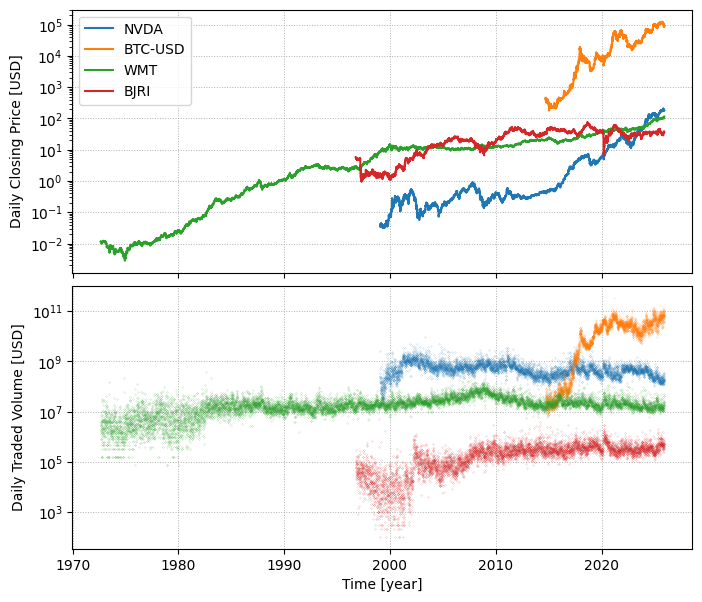

In [19]:
if True:  # close entire code block here
    import pandas as pd
    from matplotlib import gridspec, pyplot as plt
    import os
    import numpy as np
    from pathlib import Path

    # List of currently available files
    TICKERS = ['^GSPC', 'WMT', 'AMZN', 'TSLA', 'NVDA', 'BJRI', 'BTC-USD', 'ETH-USD', 'GC=F', 'VNQ', 'MSFT',
               'OTP.BD', 'MOL.BD', 'MTELEKOM.BD', 'RICHTER.BD']
    TICKERS_SAMPLE = ['NVDA', 'BTC-USD', 'WMT', 'BJRI']
    
    DATA_FOLDER = 'data'
    USD_HUF = 328

    data = dict()  # Data for a ticker
    for ticker in TICKERS:

        # --- Read csv to dataframe ---
        df = pd.read_csv(str(Path(DATA_FOLDER) / f'{ticker}.csv'))

        # formatting
        df = df.drop(df.index[[0, 1]])
        df = df.rename(columns={'Price': 'Date'})

        # select columns and set their types 
        df = df[['Date', 'Close', 'Volume']]
        df.Date = pd.to_datetime(df.Date)
        df.Close = pd.to_numeric(df.Close, errors='coerce')
        df.Volume = pd.to_numeric(df.Volume, errors='coerce')

        # Convert HUF to USD
        if ticker.endswith('.BD'):
            df.Close /= USD_HUF
            df.Volume /= USD_HUF

        data[ticker] = df.dropna()
        
    # --- Create a figure. Define a 2 rows x 1 column grid ---
    fig = plt.figure(figsize=(8, 7))
    gs = gridspec.GridSpec(2, 1, figure=fig)

    # --- Daily Closing Price ---
    ax_price = fig.add_subplot(gs[0, 0])
    for ticker in TICKERS_SAMPLE:
        ax_price.plot(data[ticker].Date, data[ticker].Close, '-', markersize=0.2, label=ticker, zorder=2)
    ax_price.set_yscale('log')
    ax_price.set(xlabel='Time [year]', ylabel='Daily Closing Price [USD]')
    ax_price.grid(linestyle=':', linewidth=0.7, zorder=1)
    ax_price.label_outer()
    ax_price.legend(loc='upper left')
    
    # --- Daily Traded Volume ---
    ax_volume = fig.add_subplot(gs[1, 0])
    for ticker in TICKERS_SAMPLE:
        ax_volume.plot(data[ticker].Date, data[ticker].Volume, '.', markersize=0.2, label=ticker, zorder=2)
    ax_volume.set_yscale('log')
    ax_volume.set(xlabel='Time [year]', ylabel='Daily Traded Volume [USD]')
    ax_volume.grid(linestyle=':', linewidth=0.7, zorder=1)

    # --- Finalize the plot ---      
    plt.subplots_adjust(hspace=0.05) # Set spacing between subplots
    plt.show()  # Display the plot directly

## Daily and Monthly log return

<span style="font-weight:bold;color:red;background-color:yellow">TODO: continue here</span>

1. Noting that the vertical scale is logarithmic, which stocks have had long periods of exponential growth ?
2. In which year did WMT (Walmart) have bigger changes relative to itself: 1975 or 2005 ?

C:\Users\illes\anaconda3\envs\fin_course_env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\illes\anaconda3\envs\fin_course_env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\illes\anaconda3\envs\fin_course_env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\illes\anaconda3\envs\fin_course_env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\illes\anaconda3\envs\fin_course_env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\illes\anacond

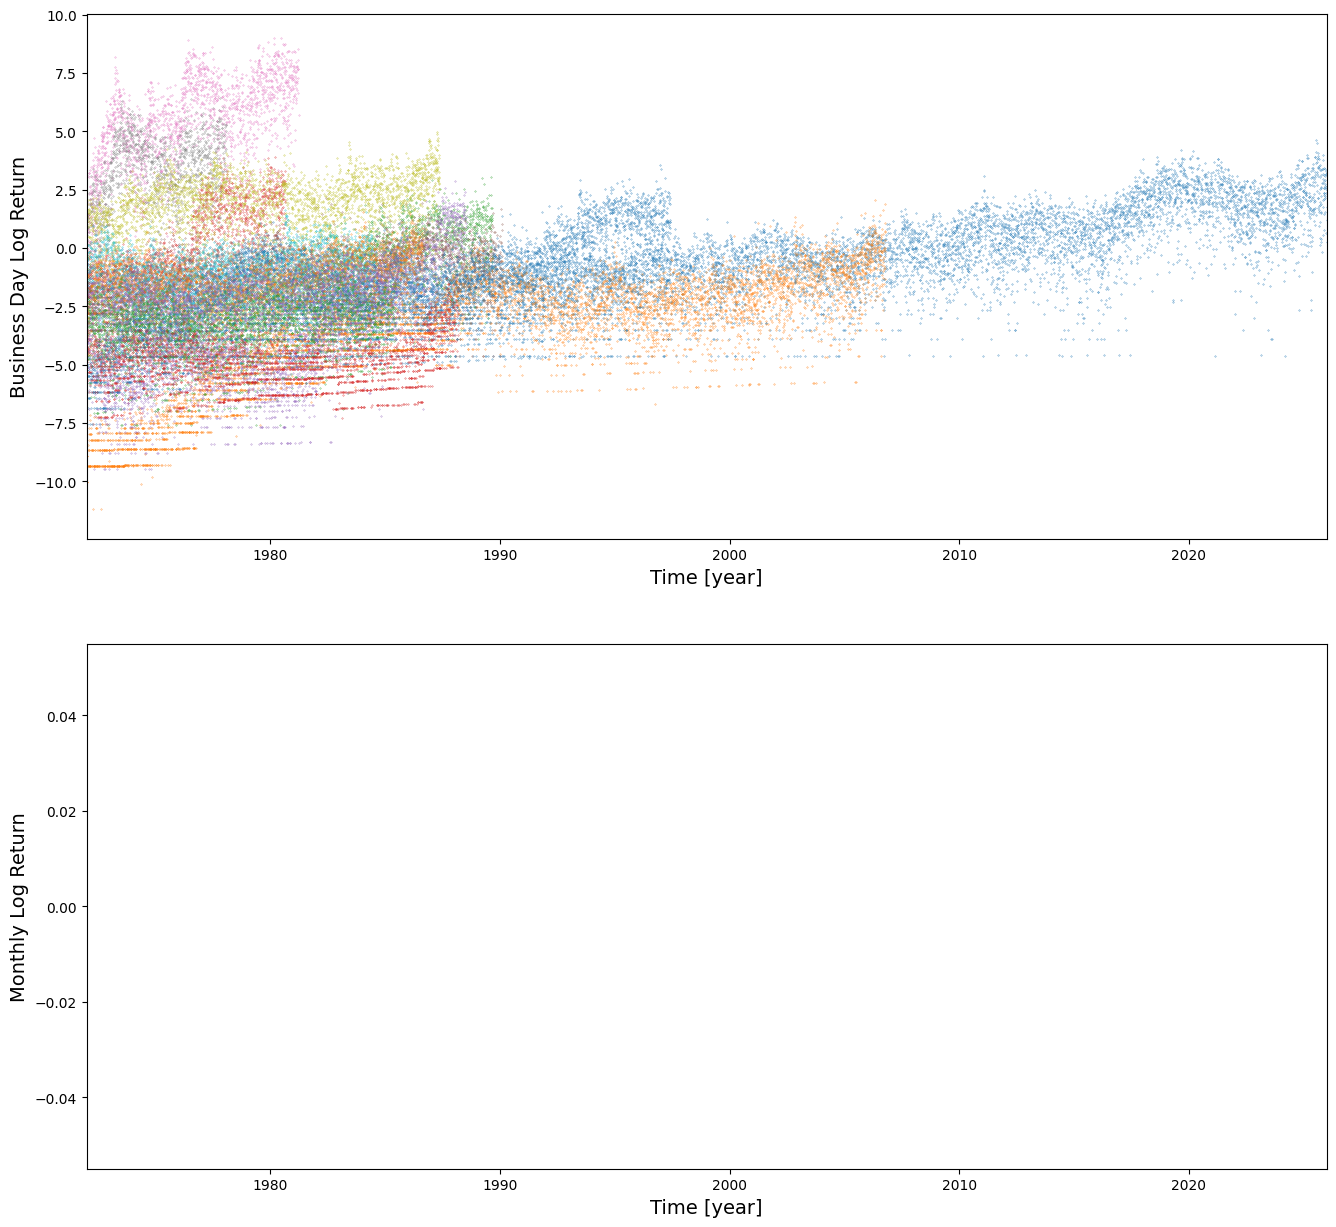

In [54]:
if True:  # close entire code block here

    import datetime

    
    def get_last_date_in_each_month(series_of_dates):
        """
        From a series_of_dates get the list_of_last_dates_in_each_month
        """
        list_of_last_dates_in_each_month = []
        groupby_years = series_of_dates.groupby(pd.to_datetime(series_of_dates).dt.year)
        for year, series_of_dates_for_year in groupby_years:
            groupby_months_of_year = series_of_dates_for_year.groupby(series_of_dates_for_year.dt.month)
            for month, group_of_month in groupby_months_of_year:
                list_of_last_dates_in_each_month.append(max(group_of_month))

        return list_of_last_dates_in_each_month


    def get_daily_and_monthly_log_returns(_data):
        """
        Input:
            yfinance dataframes by ticker

        Returns:
            {'daily': daily log return by ticker,
             'monthly': monthly log return by ticker}
        """
        daily_log_returns = dict()
        monthly_log_returns = dict()
        for ticker, df in _data.items():
            daily_log_returns[ticker] = np.log(df.Close - df.Close.shift())
            last_date_of_each_month = get_last_date_in_each_month(df.Date)
            df_on_month_last_dates_only = pd.DataFrame(df, index=last_date_of_each_month)
            monthly_log_returns[ticker] = np.log(df_on_month_last_dates_only.Close -
                                                 df_on_month_last_dates_only.Close.shift())

        return daily_log_returns, monthly_log_returns


    def plot_log_returns(daily_log_returns, monthly_log_returns):

        # --- plot daily log returns ---
        plt.subplot(211)
        for ticker, daily_log_returns_of_ticker in daily_log_returns.items():
            plt.plot(daily_log_returns_of_ticker, marker='.', ms=0.5, label=ticker, lw=0)
        plt.yscale('linear')
        plt.xlabel('Time [year]', fontsize=14)
        plt.ylabel('Business Day Log Return', fontsize=14)
        plt.xlim([datetime.date(1972, 1, 1), datetime.date(2025, 12, 31)])

        # --- plot monthly log returns ---
        plt.subplot(212)
        for ticker, monthly_log_returns_of_ticker in monthly_log_returns.items():
            plt.plot(monthly_log_returns_of_ticker, marker='.', ms=0.5, label=ticker, lw=0)
        plt.yscale('linear')
        plt.xlabel('Time [year]', fontsize=14)
        plt.ylabel('Monthly Log Return', fontsize=14)
        plt.xlim([datetime.date(1972, 1, 1), datetime.date(2025, 12, 31)])

        fig = plt.gcf()
        fig.set_size_inches([16, 15])
        plt.show()


    daily, monthly = get_daily_and_monthly_log_returns(_data=data)
    plot_log_returns(daily_log_returns=daily, monthly_log_returns=monthly)

## Log return distribution vs Normal

$(1)\,\,$ On which time scale is BTC closer to normal: daily log returns or monthly log returns ?

$(2)\,\,$ Can you find any data errors, for example, cutoff around zero ?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf
import pandas as pd

PAR['cdf'] = {
    'yahoo_codes': YAHOO_CODES,
    'yahoo_colors': YAHOO_COLORS,
    'code_to_index': {code:index for index, code in enumerate(YAHOO_CODES)},
    'selected_code': 'BTC-USD',  # selected data set for plotting
    'figure_size': (14, 10),
    'fontsize': 14,
    'plot_all': False,  # plot all data sets on the right hand side plots ?
    'subplots_wspace': 0.2,
    'subplots_hspace': 0.5
}

PAR['cdf']['selected_color'] = PAR['cdf']['yahoo_colors'][PAR['cdf']['code_to_index'][PAR['cdf']['selected_code']]]


def get_series_cdf(series=None):
    """
    Calculate CDF (cumulated density function) of a series
    """
    series_dropna = series.dropna()
    series_dropna_sorted = np.sort(series_dropna)
    n = series_dropna.size
    values = np.arange(1, n + 1) / n

    return(series_dropna_sorted, values)


def get_normal_cdf_value(x=None, mu=None, sigma=None): 
    """
    CDF function value of normal distribution with parameters mu, sigma
    """
    return 0.5 * (1.0 + erf((x - mu) / (sigma * np.sqrt(2.0)))) 


def plot_comparison_to_normal_distribution(par=None, df=None, dfm=None):
    """
    Compare to the normal distribution the daily / monthly log return distributions
    """

    print('\n\n\tSee figures in this order: (1) top left, (2) top right, (3) bottom left, (4) bottom right.\n\n'
          '\tAfter that change the "plot_all" setting to True and replot all.\n\n')

    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=par['figure_size'])
    for index_of_row, period in enumerate(['DAILY', 'MONTHLY']):
        dfsel = {key:df[key].copy() for key in df} if period == 'DAILY' else {key:dfm[key].copy() for key in dfm}

        # Left panel: Plot only the one selected time series as an example
        cdfx, cdfy = get_series_cdf(dfsel[par['selected_code']]['LogReturn'])  # CDF of daily log returns
        popt, pcov = curve_fit(get_normal_cdf_value, cdfx, cdfy)  # fit normal CDF to observed CDF
        cdfy_fit = get_normal_cdf_value(cdfx, *popt)  # CDF fit points

        ax = axes[index_of_row][0]
        ax.set_xlabel(period + ' log return', fontsize=par['fontsize'])
        ax.set_ylabel('Cumulated density function  (CDF)', fontsize=par['fontsize'])
        ax.set_title(par['selected_code'] + ' : Observed CDF and Normal Fit CDF', fontsize=par['fontsize'])
        ax.plot(cdfx, cdfy, c=par['selected_color'], marker='o', label=par['selected_code'], markersize=1, lw=1)
        ax.plot(cdfx, cdfy_fit, c='k', ls=':', label='Normal fit',lw=1)
        ax.legend(bbox_to_anchor=(.02, .93), loc=2, borderaxespad=0., fontsize=par['fontsize'])
        ax.axhline(0, c='k', ls=':', lw=.3)
        ax.axhline(1, c='k', ls=':', lw=.3)
        ax.axvline(0, c='k', ls=':', lw=.3)

        # Right panel: Plot only selected or Plot all
        ax = axes[index_of_row][1]
        for code, color in zip(par['yahoo_codes'], par['yahoo_colors']):
            if par['plot_all'] or not par['plot_all'] and code == par['selected_code']:
                cdfx, cdfy = get_series_cdf(dfsel[code]['LogReturn'])  # CDF of daily log returns
                popt, pcov = curve_fit(get_normal_cdf_value, cdfx, cdfy)  # fit normal CDF to observed CDF
                cdfy_fit = get_normal_cdf_value(cdfx, *popt)  # CDF fit points
                ax.plot(cdfy_fit, cdfy, c=color, marker='.', label=code, markersize=1, lw=1)
        ax.set_xlabel('Normal fit CDF', fontsize=par['fontsize'])
        ax.set_ylabel(f'Observed {period} log returns CDF', fontsize=par['fontsize'])
        ax.set_title('Slope > 1 means : observed PDF > normal PDF', fontsize=par['fontsize'])
        ax.plot([0,1], [0,1], 'k:', lw=1, label='Slope=1')  # slope=1 for comparison
        ax.legend(bbox_to_anchor=(0.02, .98), loc=2, borderaxespad=0., fontsize=par['fontsize'])
    
    fig = plt.gcf()
    plt.subplots_adjust(wspace=par['subplots_wspace'], hspace=par['subplots_hspace'])
    plt.show()


df, dfm = read_and_prepare_data(par=PAR['returns'], par_read=PAR['read'])
plot_comparison_to_normal_distribution(par=PAR['cdf'], df=df, dfm=dfm)

## Log return and Abs value of log return

$(1)\,\,$ The number beside each symbol shows 1-step autocorrelation, for example, WMT (0.055). Which ticker's log return has negative autocorrelation ?

$(2)\,\,$ When we switch from log return to the abs value of log return, how does the autocorrelation change ?

In [ ]:
import matplotlib.pyplot as plt

PAR['log_abs'] = {
    'yahoo_codes': YAHOO_CODES,
    'yahoo_colors': YAHOO_COLORS,
    'xlims': [0, 100],
    'ylims': [-.45, .45],
    'abs_ylims': [-.02, .45],
    'fontsize': 14,
    'marker': 'o',
    'markersize': 2,
    'date_min_max': PAR['returns']['date_min_max'],
    'ticks_fontsize': 12,
    'subplots_hspace': 0.4,
    'figsize_inches': [12, 10]
}


def plot_log_returns_and_abs_log_returns(par=None, df=None):

    print('\n\n\tAutocorrelation (over 1 business day) is shown after each symbol\n\n'
          '\tDescribe in a few words each series based on autocorr(log return) and autocorr(abs(log return))\n\n')

    set_ticks_fontsize(plt=plt, fontsize=par['ticks_fontsize'])

    # daily log return
    plt.subplot(211)
    for code, color in zip(par['yahoo_codes'], par['yahoo_colors']):
        s = df[code]['LogReturn']
        plt.plot(s, c=color, marker=par['marker'], ms=par['markersize'], label=f'{code} ({s.autocorr():.3f})', lw=0)
    plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=par['fontsize'])
    plt.yscale('linear')
    plt.xlabel('Time [year]', fontsize=par['fontsize'])
    plt.ylabel('Daily Log Return', fontsize=par['fontsize'])
    plt.xlim(par['date_min_max'])
    plt.ylim(par['ylims'])

    # absolute value of daily log return
    plt.subplot(212)
    for code, color in zip(par['yahoo_codes'], par['yahoo_colors']):
        s = np.absolute(df[code]['LogReturn'])
        plt.plot(s, c=color, marker=par['marker'], ms=par['markersize'], label=f'{code} ({s.autocorr():.3f})', lw=0)
    plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=par['fontsize'])
    plt.yscale('linear')
    plt.xlabel('Time [year]', fontsize=par['fontsize'])
    plt.ylabel('Absolute value of Log Return', fontsize=par['fontsize'])
    plt.xlim(par['date_min_max'])
    plt.ylim(par['abs_ylims'])

    fig = plt.gcf()
    plt.subplots_adjust(hspace=par['subplots_hspace'])
    fig.set_size_inches(par['figsize_inches'])
    plt.show()


df, _ = read_and_prepare_data(par=PAR['returns'], par_read=PAR['read'])
plot_log_returns_and_abs_log_returns(par=PAR['log_abs'], df=df)

## Autocorr of log return and abs log return

These plots show autocorrelation vs time difference. 

1. Which daily log return has significantly nonzero autocorrelation ?
2. Which abs daily log return has the highest and lowest autocorrelation after long time ?


In [ ]:
import matplotlib.pyplot as plt

PAR['autocorr'] = {
    'yahoo_codes': YAHOO_CODES,
    'yahoo_colors': YAHOO_COLORS,
    'autocorr_len': 126,  # check autocorrelation up to this number of business days
    'xmargin_of_plot': 3,
    'fontsize': 14,
    'ylims': (-0.2, 0.4),
    'yticks': [-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4],
    'marker': 'o',
    'markersize': 4,
    'axhline_width': 0.5,
    'ticks_fontsize': 12,
    'subplots_wspace': 0.03,
    'figsize_inches': [15, 7]
}

PAR['autocorr']['autocorr_shifts'] = np.arange(1 , PAR['autocorr']['autocorr_len'] + 1)
PAR['autocorr']['xlims'] = (1 - PAR['autocorr']['xmargin_of_plot'], 
                            PAR['autocorr']['autocorr_len'] + PAR['autocorr']['xmargin_of_plot'])


def plot_autocorr(par=None, df=None):

    # daily log return
    plt.subplot(121)
    for code, color in zip(par['yahoo_codes'], par['yahoo_colors']):
        s = df[code]['LogReturn']
        autocorr_values = [s.autocorr(shift) for shift in par['autocorr_shifts']]
        plt.plot(par['autocorr_shifts'], autocorr_values, c=color,
                 marker=par['marker'], ms=par['markersize'], label=code, lw=0)
    plt.legend(bbox_to_anchor=(.97, .98), loc=1, borderaxespad=0., fontsize=par['fontsize'])
    plt.title('Autocorrelation of daily log return', fontsize=par['fontsize'])
    plt.yscale('linear')
    plt.xlabel('Shift [business days]', fontsize=par['fontsize'])
    plt.ylabel('Autocorrelation with selected shift', fontsize=par['fontsize'])
    plt.axhline(0, c='k', ls=':', lw=par['axhline_width'])
    plt.axvline(0, c='k', ls=':', lw=par['axhline_width'])
    plt.ylim(par['ylims'])
    plt.yticks(par['yticks'], [str(_) for _ in par['yticks']])

    # daily log return
    plt.subplot(122)
    for code, color in zip(par['yahoo_codes'], par['yahoo_colors']):
        s = np.absolute(df[code]['LogReturn'])
        autocorr_values = [s.autocorr(shift) for shift in par['autocorr_shifts']]
        plt.plot(par['autocorr_shifts'], autocorr_values, c=color,
                 marker=par['marker'], ms=par['markersize'], lw=0)
    plt.title('Autocorr. of the **absolute** value of the daily log return', fontsize=par['fontsize'])
    plt.yscale('linear')
    plt.xlabel('Shift [business days]', fontsize=par['fontsize'])
    plt.axhline(0, c='k', ls=':', lw=par['axhline_width'])
    plt.axvline(0, c='k', ls=':', lw=par['axhline_width'])
    plt.ylim(par['ylims'])
    plt.yticks(par['yticks'], ['' for _ in par['yticks']])

    set_ticks_fontsize(plt=plt, fontsize=par['ticks_fontsize'])
    fig = plt.gcf()
    plt.subplots_adjust(wspace=par['subplots_wspace'])
    fig.set_size_inches(par['figsize_inches'])
    plt.show()


df, _ = read_and_prepare_data(par=PAR['returns'], par_read=PAR['read'])
plot_autocorr(par=PAR['autocorr'], df=df)

## Volume vs log Return

1. What do you conclude from daily log return vs traded volume plotted for each day ?
2. What do you conclude when points are binned by log return ?
3. Do your conclusions change if you select a different time window ( not 2014 - 2019 ) ?

In [ ]:
# the Budapest Stock Exchange (bse) time series contain trading volume
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

PAR['volume'] = {
    'bse_codes': BSE_CODES,
    'bse_colors': BSE_COLORS,
    'markersize': 2,
    'markersize_large': 5,
    'xlimits': (-1.1, 1.1),
    'ylimits': (0.007, 500),
    'xtics': [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
    'ytics': [0.01, 0.1, 1, 10, 100],
    'axvline_width': 0.5,
    'subplots_wspace': 0.03,
    'marker': 'o',
    'fontsize': 14,
    'ticks_fontsize': 12,
    'selected_code': None,  # if None, then all are plotted
    'figsize_inches': [13, 5]
}

PAR['volume']['xbins'] = np.linspace(*PAR['volume']['xlimits'], 100)


def plot_volume_vs_log_return(par=None, df=df):
    
    # set index to datetime, set closing value, log return, and traded volume
    for code in par['bse_codes']:
        df[code].index = pd.to_datetime(df[code]['Date'])
        df[code]['Close'] = df[code]['Close price']
        df[code]['LogReturn'] = np.log(df[code]['Close price']) - np.log(df[code]['Close price'].shift())
        df[code]['Volume'] = df[code]['Volume (HUF value)']

    # left subplot
    plt.subplot(121)
    for code, color in zip(par['bse_codes'], par['bse_colors']):
        if par['selected_code'] is None or code == par['selected_code']:
            plt.plot(df[code]['LogReturn'], df[code]['Volume'] / 1e+9, c=color, label=code,
                     marker=par['marker'], markersize=par['markersize'], lw=0)
    plt.xlim(*par['xlimits'])
    plt.ylim(*par['ylimits'])
    plt.title('Daily traded volume vs log return')
    plt.yscale('log')
    plt.xlabel('Daily log return', fontsize=par['fontsize'])
    plt.xticks(par['xtics'], [f'{xtic:.2g}'.replace('-', '$-$') for xtic in par['xtics']])
    plt.ylabel('Traded volume (billion HUF)', fontsize=par['fontsize'])
    plt.yticks(par['ytics'], [str(_) for _ in par['ytics']])
    plt.axvline(0, c='k', ls=':', lw=par['axvline_width'])

    # right subplot
    plt.subplot(122)
    for code, color in zip(par['bse_codes'], par['bse_colors']):
        if par['selected_code'] is None or code == par['selected_code']:
            groups = df[code].groupby(pd.cut(df[code]['LogReturn'], par['xbins']))
            plot_centers = (par['xbins'][:-1] + par['xbins'][1:]) / 2
            plot_values = groups['Volume'].mean() / 1e+9
            plt.plot(plot_centers, plot_values, c=color, label=code,
                     marker=par['marker'], markersize=par['markersize_large'], lw=0)
    plt.xlim(*par['xlimits'])
    plt.ylim(*par['ylimits'])
    plt.title('Traded volume is averaged in bins of log return')
    plt.yscale('log')
    plt.xlabel('Daily log return', fontsize=par['fontsize'])
    plt.xticks(par['xtics'], [f'{xtic:.2g}'.replace('-', '$-$') for xtic in par['xtics']])
    # do not display yticks
    plt.yticks(par['ytics'], ['' for ytic in par['ytics']])
    plt.axvline(0, c='k', ls=':', lw=par['axvline_width'])
    plt.legend(bbox_to_anchor=(0.03, 0.97), loc=2, borderaxespad=0., fontsize=par['fontsize'])

    set_ticks_fontsize(plt=plt, fontsize=par['ticks_fontsize'])
    fig = plt.gcf()
    plt.subplots_adjust(wspace=par['subplots_wspace'])
    fig.set_size_inches(par['figsize_inches'])
    plt.show()


df, _ = read_and_prepare_data(par=PAR['returns'], par_read=PAR['read'])
plot_volume_vs_log_return(par=PAR['volume'], df=df)

## Volume vs Volatility of daily close

1. Based on the below scatter plot what do you conclude for the relationship between daily log(volume) and log(volatility) ?
2. Based on the roughly even distribution of the daily points in the plot what is your chance of having a high volume day ?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

PAR['volume_vs_volatility'] = {
    'bse_codes': BSE_CODES,
    'bse_colors': BSE_COLORS,
    'markersize': 4,
    'marker': 'o',
    'fontsize': 14,
    'ticks_fontsize': 13,
    'xtics': [10, 100, 1000],
    'ytics': [0.1, 1, 10],
    'selected_code': None,  # if None, then all are plotted
    'figsize_inches': [8, 6]
}


def calculate_bse_monthly_volatility_and_average_traded_volume(data=None):
    '''
    For the BSE (Budapest Stock Exchange) data sets:
    for each month calculate the volatility of the daily close and the average daily traded volume.    
    '''
    monthly_data = pd.DataFrame(columns=['volatility', 'average_volume'])
    dates = data.index
    yearly_dates = dates.groupby(dates.year)
    for year in yearly_dates.keys():
        monthly_dates = pd.DatetimeIndex(yearly_dates[year]).groupby(pd.DatetimeIndex(yearly_dates[year]).month)
        for month in monthly_dates.keys():
            date_all = monthly_dates[month]
            date_first = min(date_all)
            close_daily_all = [data.loc[date]['Close price'] for date in date_all]
            volume_daily_all = [data.loc[date]['Volume (HUF value)'] for date in date_all]
            volatility = np.std(close_daily_all)
            volume_daily_average = np.average(volume_daily_all)
            monthly_data.loc[date_first] = [volatility, volume_daily_average]

    return monthly_data


def plot_bse_volume_vs_volatility(par=None, df=None):
    """
    For the BSE (Budapest Stock Exchange) data sets:
    plot the monthly volatilty vs avg daily volume of the month.
    """
    
    monthly_data = {}
    for code, color in zip(par['bse_codes'], par['bse_colors']):
        if par['selected_code'] is None or code == par['selected_code']:
            monthly_data[code] = calculate_bse_monthly_volatility_and_average_traded_volume(data=df[code])
            plt.plot(monthly_data[code]['volatility'], monthly_data[code]['average_volume'] / 1e+9,
                     c=color, marker=par['marker'], label=code, lw=0, markersize=par['markersize'])
    plt.legend(bbox_to_anchor=(.92, .08), loc=4, borderaxespad=0., fontsize=par['fontsize'])
    plt.title('Monthly data: Average daily volume vs Volatility of daily close', fontsize=par['fontsize'])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Volatility of daily close in a month (HUF)', fontsize=par['fontsize'])
    plt.ylabel('Average daily volume in a month (billion HUF)', fontsize=par['fontsize'])
    plt.xticks(par['xtics'], [f'{xtic:g}' for xtic in par['xtics']])
    plt.yticks(par['ytics'], [f'{ytic:g}' for ytic in par['ytics']])

    set_ticks_fontsize(plt=plt, fontsize=par['ticks_fontsize'])
    fig = plt.gcf()
    fig.set_size_inches(par['figsize_inches'])
    plt.show()


df, _ = read_and_prepare_data(par=PAR['returns'], par_read=PAR['read'])
plot_bse_volume_vs_volatility(par=PAR['volume_vs_volatility'], df=df)

## Skewness of log returns distribution 

1. What does the sum of the highest and the lowest value tell about a distribution ?
2. Does the negative skew of SP500 mean that stock prices respond faster to negative news than to positive news ?


| Name | Symbol and Calculation |
|:-----|:------------|
| Random variable | $X$ |
| Mean | $\mu = E\left[ \,X \,\right]$ |
| Variance | ${\displaystyle \sigma^{\,2} = E\left[ \, \left( \, X - \mu \, \right)^{\,2} \, \right] }$ |
| Volatility = Std.dev. | $\sigma$ |
| Skewness | ${\displaystyle E\left[\,\left(\frac{X-\mu}{\sigma}\,\right)^{\,3} \, \right]}$|

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from os.path import join

PAR['skewness'] = {
    # select data sets to be analyzed and set their display names
    'fred_selected_codes': {
        'GOLDPMGBD228NLBM': 'GOLD',
        'DEXJPUS':'JPYUSD', 
        'ICERATES1500USD1Y': 'US1YSW',
        'SP500': 'SP500',
        'WILLRESIPR': 'WILLSH'
    },
    'data_dir': 'data'
}


def read_fred_selected(par=None):
    """
    Read FRED data sets without the lines containing a dot instead of data
    Calculate also the log returns
    """
    df = {}

    for code in par['fred_selected_codes']:
        df[code] = pd.read_csv(join(par['data_dir'], code + '.csv'), na_values=['.'])
        df[code].dropna(inplace=True)
        df[code]['LogReturn'] = np.log(df[code][code]) - np.log(df[code][code]).shift()
        
    return df


def get_skewness(par=None, df=None):
    """
    For the selected FRED data sets write their skewness to stdout and plot differences among the skewnesses
    """

    df_out = pd.DataFrame(columns=['Skew', 'First+Last', 'Name'])
    
    for index, code in enumerate(par['fred_selected_codes']):
        log_returns = df[code]['LogReturn'].dropna()
        sorted_log_returns = pd.Series.sort_values(log_returns).tolist()  # sort into ascending order

        df_out.loc[index] = [
            f'{stats.skew(sorted_log_returns):+.2f}',
            f'{sorted_log_returns[0] + sorted_log_returns[-1]:+.3f}',
            par['fred_selected_codes'][code]
        ]

    df_out.set_index('Name', inplace=True)    
    return df_out

        
df = read_fred_selected(par=PAR['skewness'])
df_out = get_skewness(par=PAR['skewness'], df=df)
display(df_out)

## Task: yearly mean of daily log returns and yearly volatility
For each year separately, calculate (1) the mean of the daily log return of WMT, and (2) the volatility of the daily log returns of WMT.

###### Answer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

PAR['mean_vol'] = {
    'fontsize': 12,
    'data_dir': 'data',
    'selected_data_set': 'WMT',
    'figure_size': (9, 6)
}


def yearly_mean_and_vol_of_daily_log_return(par=None):
    
    # data processing
    df = pd.read_csv(join(par['data_dir'], par['selected_data_set'] + '.csv'))
    df['Year'] = pd.to_datetime(df.Date).dt.year
    df['LogReturnDaily'] = np.log(df['Close']) - np.log(df['Close'].shift())
    daily_log_ret_yearly_mean = df.groupby(df.Year).LogReturnDaily.agg('mean')
    daily_log_ret_vol = df.groupby(df.Year).LogReturnDaily.agg('std')

    # plotting
    fig, axes = plt.subplots(figsize=par['figure_size'])
    plt.plot(daily_log_ret_yearly_mean, markersize=10, marker='.', linestyle=':', linewidth=1, color='g')
    plt.plot(daily_log_ret_vol, markersize=10, marker='.', linestyle=':', linewidth=1, color='b')
    plt.title(f'Yearly mean (green) and volatility (blue) of the daily log returns of ' + par['selected_data_set'],
              fontsize=par['fontsize'])
    plt.xlabel('Y e a r', fontsize=par['fontsize'])
    plt.ylabel('Daily log returns: avg. and std.dev', fontsize=par['fontsize'])
    plt.axhline(0, c='k', ls=':', lw=.3)
    plt.show()

    # investigate the average returns in sorted order
    print('Yearly mean of daily log returns in sorted order\n')
    display(daily_log_ret_yearly_mean.sort_values())


yearly_mean_and_vol_of_daily_log_return(par=PAR['mean_vol'])